In [1]:
# here instead of using correlated input streams (coming from wikipedia2vec of words in a story) we will use
# uncorrelated inputs ” constructed as random and independent sequences of vectors generated by sample 
#Gaussian-distributed random numbers.  as suggested by reviewer Chris Honey

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns
import pandas as pd


import csv

import scipy
from scipy import stats

res_seed = 1
Normalizing = True

In [3]:
#import cupy as cp
import numpy as np
import nltk


vectorDim = 100

numNode = 1000

#inputDataTraining = np.load('./trainingData_averaging/inputDataTraining_4k_average.npy')
#outputDataTraining = np.load('./trainingData_averaging/outputDataTraining_4k_average.npy')
#print(len(inputDataTraining))
#print(len(outputDataTraining))

In [4]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

(682, 100)


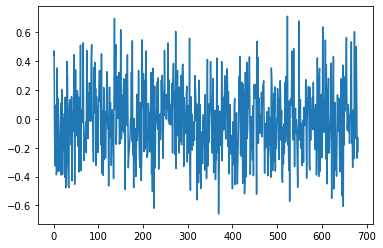

In [5]:
mu, sigma = 0, 0.25 # mean and standard deviation
np.random.seed(0)

inputDataTesting = np.random.normal(mu, sigma, [682,100])
print(inputDataTesting.shape)
plt.plot(inputDataTesting[:,:1])

In [6]:
#create inputAverageTesting by averaging successive words in inputDataTesting
#inputAverageTesting = np.empty((0,vectorDim))
past_a =  .95
present_a = 1.05
past_b =  .9
present_b = 1.1
past_c = .8
present_c = 1.2

inputAverageTesting1a = np.zeros((len(inputDataTesting),vectorDim))
inputAverageTesting1b = np.zeros((len(inputDataTesting),vectorDim))
inputAverageTesting1c = np.zeros((len(inputDataTesting),vectorDim))

print(inputAverageTesting1a.shape)

for num in range(len(inputDataTesting)):
        if num == 0:
            inputAverageTesting1a[num] = inputDataTesting[num]
            inputAverageTesting1b[num] = inputDataTesting[num]
            inputAverageTesting1c[num] = inputDataTesting[num]
        else:
            inputAverageTesting1a[num] = past_a*inputAverageTesting1a[num-1] + present_a*inputDataTesting[num] 
            inputAverageTesting1b[num] = past_b*inputAverageTesting1b[num-1] + present_b*inputDataTesting[num] 
            inputAverageTesting1c[num] = past_c*inputAverageTesting1c[num-1] + present_c*inputDataTesting[num] 




(682, 100)


In [7]:
# here we create the scrambled input data

inputDataTesting2 = np.zeros([682,100])
print(inputDataTesting2.shape)



(682, 100)


In [8]:
inputDataTesting == inputDataTesting2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
for i in range(0,138):
    inputDataTesting2[i, :] = inputDataTesting[i,:]
for i in range(139,285):
    inputDataTesting2[i, :] = inputDataTesting[i+148,:]
for i in range(286,432):
    inputDataTesting2[i, :] = inputDataTesting[i-148,:]
for i in range(433,682):
    inputDataTesting2[i, :] = inputDataTesting[i,:]


In [10]:
inputDataTesting == inputDataTesting2
#print(inputDataTesting[:,139:285])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [11]:
#create inputAverageTesting by averaging successive words in inputDataTesting
#inputAverageTesting = np.empty((0,vectorDim))


inputAverageTesting2a = np.zeros((len(inputDataTesting),vectorDim))
inputAverageTesting2b = np.zeros((len(inputDataTesting),vectorDim))
inputAverageTesting2c = np.zeros((len(inputDataTesting),vectorDim))

print(inputAverageTesting2a.shape)

for num in range(len(inputDataTesting)):
        if num == 0:
            inputAverageTesting2a[num] = inputDataTesting2[num]
            inputAverageTesting2b[num] = inputDataTesting2[num]
            inputAverageTesting2c[num] = inputDataTesting2[num]
        else:
            inputAverageTesting2a[num] = past_a*inputAverageTesting2a[num-1] + present_a*inputDataTesting2[num] 
            inputAverageTesting2b[num] = past_b*inputAverageTesting2b[num-1] + present_b*inputDataTesting2[num] 
            inputAverageTesting2c[num] = past_c*inputAverageTesting2c[num-1] + present_c*inputDataTesting2[num] 



(682, 100)


In [12]:
correlation=np.zeros(len(inputDataTesting))
for num in range(len(inputDataTesting)):
    correlation[num] = cos_sim(inputAverageTesting1a[num],inputAverageTesting2a[num])

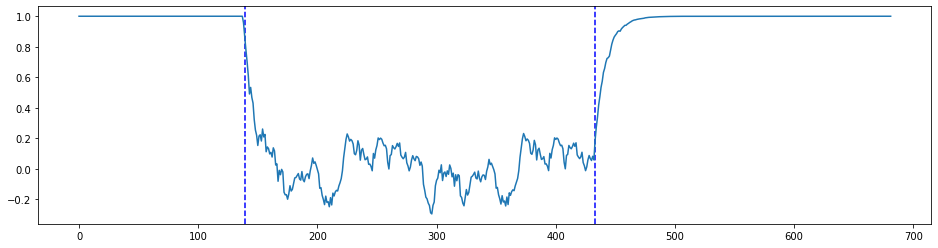

In [13]:
fig= plt.figure(figsize=(16,4))
plt.axvline(x=139, color='b', linestyle='--')
plt.axvline(x=433, color='b', linestyle='--')
plt.plot(correlation)

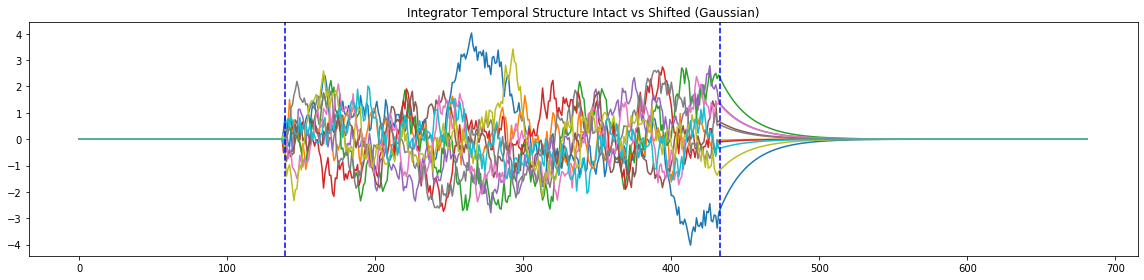

In [14]:
resn = 10
begin=0
end=682
fig= plt.figure(figsize=(16,4))


#plt.plot( inputDataTesting[begin:end,:resn] - inputDataTesting2[begin:end,:resn])
plt.plot( inputAverageTesting1a[begin:end,:resn]-inputAverageTesting2a[begin:end,:resn])
plt.title('Integrator Temporal Structure Intact vs Shifted (Gaussian)')
plt.axvline(x=139, color='b', linestyle='--')
plt.axvline(x=433, color='b', linestyle='--')


fig.tight_layout()

#plt.savefig('reservoirstates--not-the-fall-differences1.png')

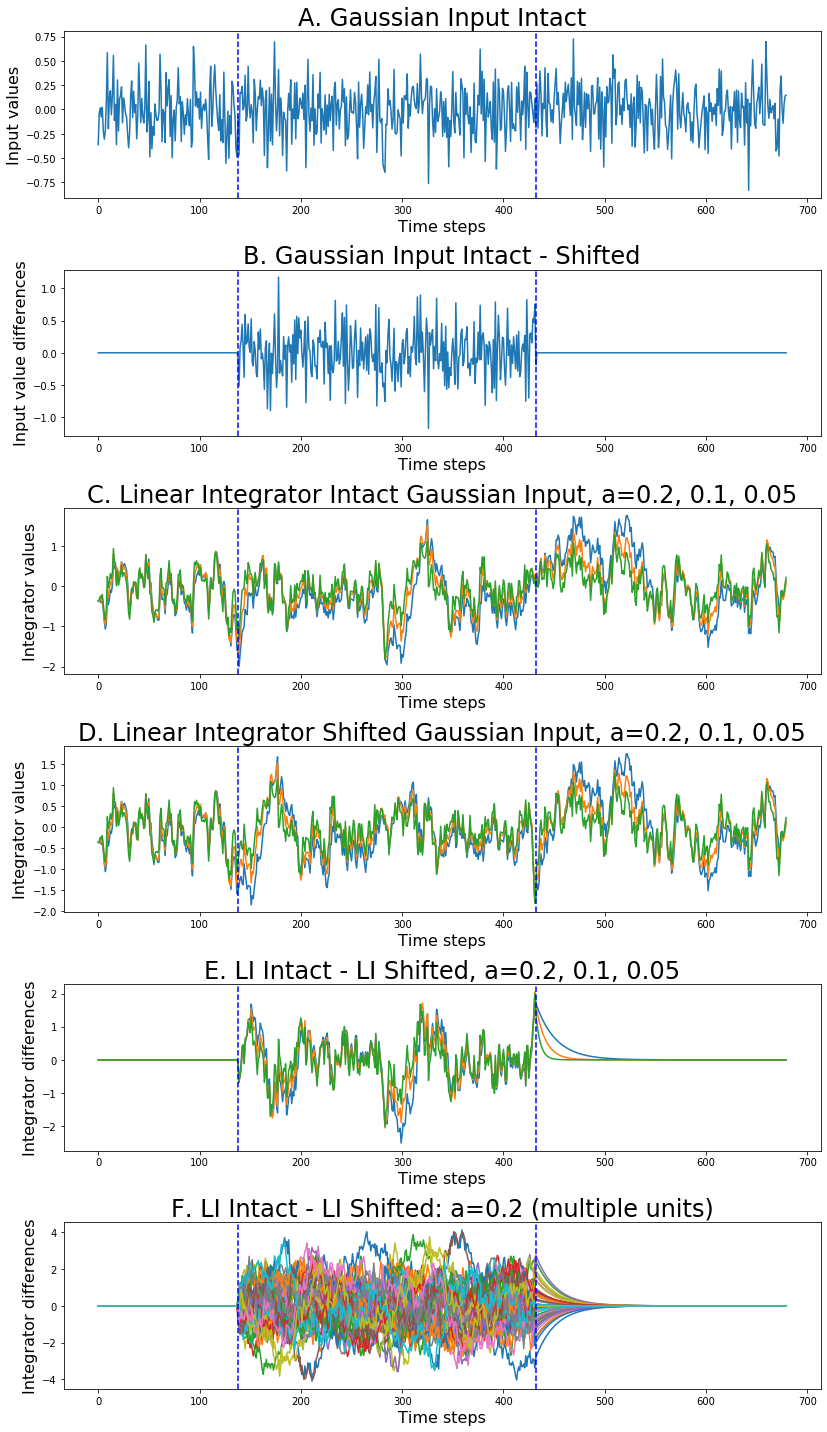

In [15]:
begin=0
end=680
fig= plt.figure(figsize=(12,20))
resbegin = 25#54
resend = 26#55
fs2=24
fs3 = 16


plt.subplot(611)
plt.plot( inputDataTesting[begin:end,resbegin:resend])
plt.title('A. Gaussian Input Intact', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Input values', fontsize=fs3)

plt.subplot(612)
plt.plot( inputDataTesting[begin:end,resbegin:resend]-inputDataTesting2[begin:end,resbegin:resend])
plt.title('B. Gaussian Input Intact - Shifted', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Input value differences', fontsize=fs3)

plt.subplot(613)
plt.plot( inputAverageTesting1a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1c[begin:end,resbegin:resend])
plt.title('C. Linear Integrator Intact Gaussian Input, a=0.2, 0.1, 0.05', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator values', fontsize=fs3)

plt.subplot(614)
plt.plot( inputAverageTesting2a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting2b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting2c[begin:end,resbegin:resend])
plt.title('D. Linear Integrator Shifted Gaussian Input, a=0.2, 0.1, 0.05', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator values', fontsize=fs3)


plt.subplot(615)
plt.plot( inputAverageTesting1a[begin:end,resbegin:resend]- inputAverageTesting2a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1b[begin:end,resbegin:resend]- inputAverageTesting2b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1c[begin:end,resbegin:resend]- inputAverageTesting2c[begin:end,resbegin:resend])
plt.title('E. LI Intact - LI Shifted, a=0.2, 0.1, 0.05', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)

plt.subplot(616)
resn=50
plt.plot( inputAverageTesting1a[begin:end,:resn]-inputAverageTesting2a[begin:end,:resn])
plt.title('F. LI Intact - LI Shifted: a=0.2 (multiple units)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)
fig.tight_layout()
#plt.savefig('wip6_7.png')







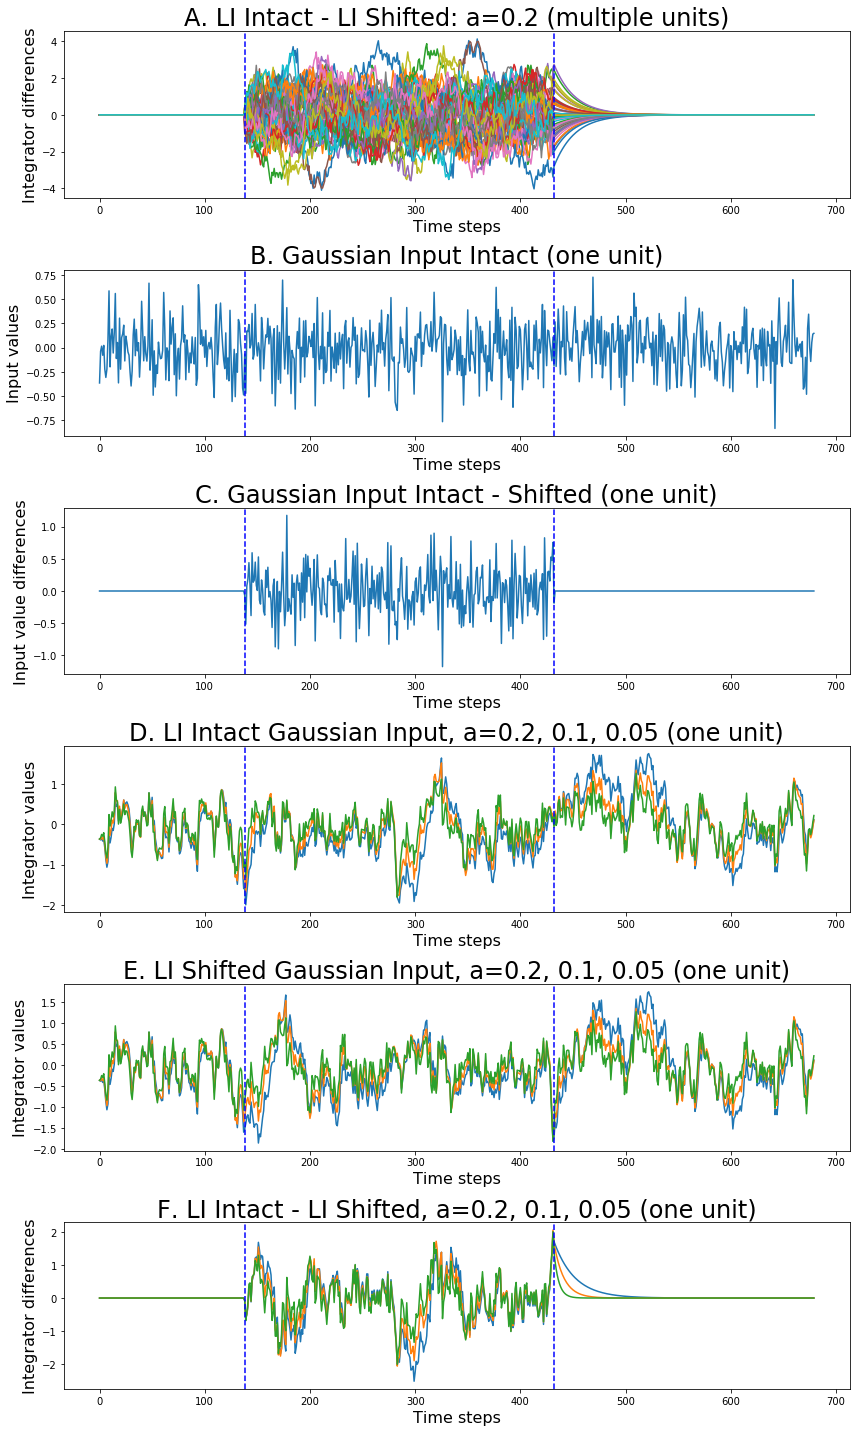

In [16]:
begin=0
end=680
fig= plt.figure(figsize=(12,20))
resbegin = 25#54
resend = 26#55
fs2=24
fs3 = 16

plt.subplot(611)
resn=50
plt.plot( inputAverageTesting1a[begin:end,:resn]-inputAverageTesting2a[begin:end,:resn])
plt.title('A. LI Intact - LI Shifted: a=0.2 (multiple units)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)

plt.subplot(612)
plt.plot( inputDataTesting[begin:end,resbegin:resend])
plt.title('B. Gaussian Input Intact (one unit)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Input values', fontsize=fs3)

plt.subplot(613)
plt.plot( inputDataTesting[begin:end,resbegin:resend]-inputDataTesting2[begin:end,resbegin:resend])
plt.title('C. Gaussian Input Intact - Shifted (one unit)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Input value differences', fontsize=fs3)

plt.subplot(614)
plt.plot( inputAverageTesting1a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1c[begin:end,resbegin:resend])
plt.title('D. LI Intact Gaussian Input, a=0.2, 0.1, 0.05 (one unit)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator values', fontsize=fs3)

plt.subplot(615)
plt.plot( inputAverageTesting2a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting2b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting2c[begin:end,resbegin:resend])
plt.title('E. LI Shifted Gaussian Input, a=0.2, 0.1, 0.05 (one unit)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator values', fontsize=fs3)


plt.subplot(616)
plt.plot( inputAverageTesting1a[begin:end,resbegin:resend]- inputAverageTesting2a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1b[begin:end,resbegin:resend]- inputAverageTesting2b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1c[begin:end,resbegin:resend]- inputAverageTesting2c[begin:end,resbegin:resend])
plt.title('F. LI Intact - LI Shifted, a=0.2, 0.1, 0.05 (one unit)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)


fig.tight_layout()
plt.savefig('F14-Revision2.png')







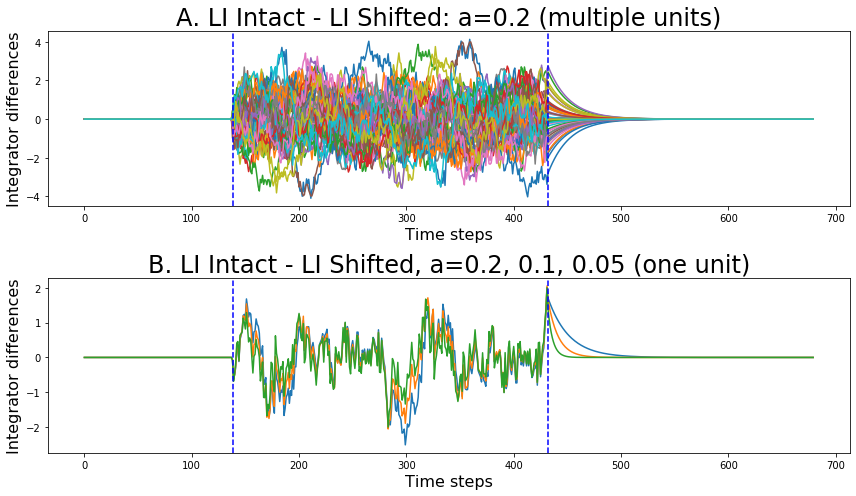

In [17]:
begin=0
end=680
fig= plt.figure(figsize=(12,7))
resbegin = 25#54
resend = 26#55
fs2=24
fs3 = 16

plt.subplot(211)
resn=50
plt.plot( inputAverageTesting1a[begin:end,:resn]-inputAverageTesting2a[begin:end,:resn])
plt.title('A. LI Intact - LI Shifted: a=0.2 (multiple units)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)


plt.subplot(212)
plt.plot( inputAverageTesting1a[begin:end,resbegin:resend]- inputAverageTesting2a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1b[begin:end,resbegin:resend]- inputAverageTesting2b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1c[begin:end,resbegin:resend]- inputAverageTesting2c[begin:end,resbegin:resend])
plt.title('B. LI Intact - LI Shifted, a=0.2, 0.1, 0.05 (one unit)', fontsize=fs2)
plt.axvline(x=138, color='b', linestyle='--')
plt.axvline(x=432, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)


fig.tight_layout()
plt.savefig('F14-Revision2-reduced.png')







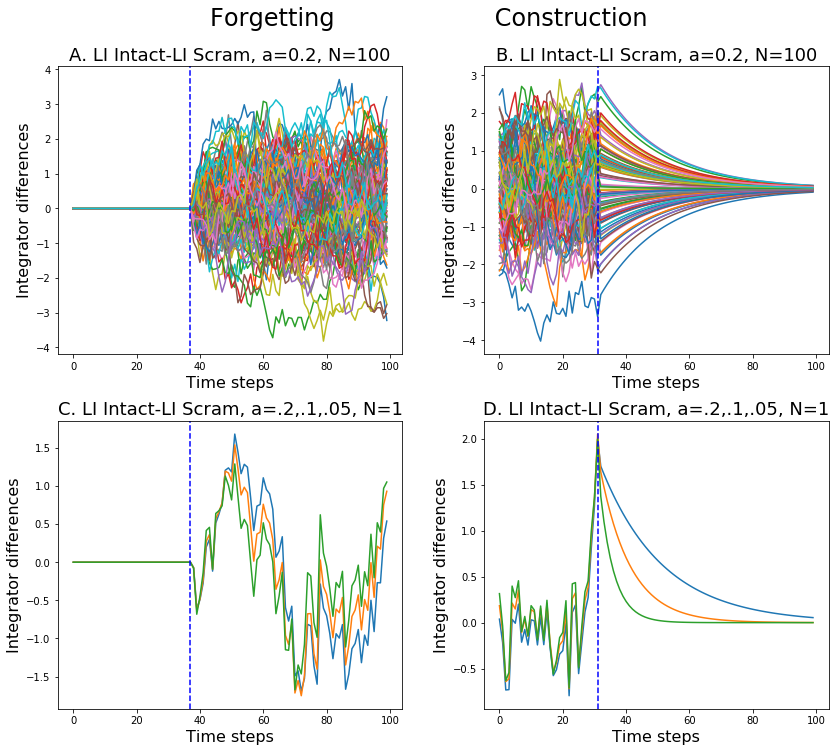

In [19]:
begin=0
end=680
fig= plt.figure(figsize=(12,10))
resbegin = 25#54
resend = 26#55
fs1=24
fs2=18
fs3 = 16
fig.suptitle("Forgetting                     Construction", fontsize=fs1,y=1.04)

plt.subplot(221)
resn=100
begin=100
end=200
plt.plot( inputAverageTesting1a[begin:end,:resn]-inputAverageTesting2a[begin:end,:resn])
plt.title('A. LI Intact-LI Scram, a=0.2, N=100', fontsize=fs2)
plt.axvline(x=37, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)

plt.subplot(222)

begin=400
end=500
plt.plot( inputAverageTesting1a[begin:end,:resn]-inputAverageTesting2a[begin:end,:resn])
plt.title('B. LI Intact-LI Scram, a=0.2, N=100', fontsize=fs2)
plt.axvline(x=31, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)


plt.subplot(223)
begin=100
end=200
plt.plot( inputAverageTesting1a[begin:end,resbegin:resend]- inputAverageTesting2a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1b[begin:end,resbegin:resend]- inputAverageTesting2b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1c[begin:end,resbegin:resend]- inputAverageTesting2c[begin:end,resbegin:resend])
plt.title('C. LI Intact-LI Scram, a=.2,.1,.05, N=1', fontsize=fs2)
plt.axvline(x=37, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)

plt.subplot(224)
begin=400
end=500
plt.plot( inputAverageTesting1a[begin:end,resbegin:resend]- inputAverageTesting2a[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1b[begin:end,resbegin:resend]- inputAverageTesting2b[begin:end,resbegin:resend])
plt.plot( inputAverageTesting1c[begin:end,resbegin:resend]- inputAverageTesting2c[begin:end,resbegin:resend])
plt.title('D. LI Intact-LI Scram, a=.2,.1,.05, N=1', fontsize=fs2)
plt.axvline(x=31, color='b', linestyle='--')
plt.xlabel('Time steps', fontsize=fs3)
plt.ylabel('Integrator differences', fontsize=fs3)

fig.tight_layout()
plt.savefig('F14-Revision2bis-reducedx.png',dpi=300, bbox_inches='tight')





